<a href="https://colab.research.google.com/github/Marvel280904/All-Python-Project/blob/main/Exercise_3_No_1_DataMining_Marvel_0706022210039.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# **K-Means Clustering**

### **Load Dataset**

Descriptions for each of the columns in the dataset:

Country: The name of the country for which CO₂ emissions data is recorded. This column allows for country-specific analysis and comparison.

Region: The geographical or administrative region to which each country belongs. This categorization facilitates regional analysis by grouping countries into broader areas, such as continents or economic zones.

Date: The year in which the CO₂ emissions data was recorded, formatted as a date for compatibility with time-series analysis and to allow temporal trends to be identified.

Kilotons of CO₂: The total amount of carbon dioxide emissions, measured in kilotons, released by each country in the specified year. This column provides a quantitative measure of national CO₂ emissions.

Metric Tons Per Capita: The per capita emissions of CO₂ for each country, expressed in metric tons. This value represents the average carbon dioxide emissions per person, offering insight into individual emissions contributions relative to population size.

In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/Marvel280904/W10---DataMining---Marvel/refs/heads/main/Carbon_(CO2)_Emissions_by_Country.csv"
df = pd.read_csv(url)
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [ ]:
# describe data
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5.677000e+03,5677.000000
mean,1.412292e+05,4.325505
std,6.491258e+05,5.503834
min,0.000000e+00,0.000000
25%,1.380000e+03,0.570000
50%,9.170000e+03,2.360000
75%,5.848000e+04,6.340000
max,1.070722e+07,47.650000


In [ ]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [ ]:
# Check for null values in the dataset
df.isnull().sum()

,0
Country,0
Region,0
Date,0
Kilotons of Co2,0
Metric Tons Per Capita,0


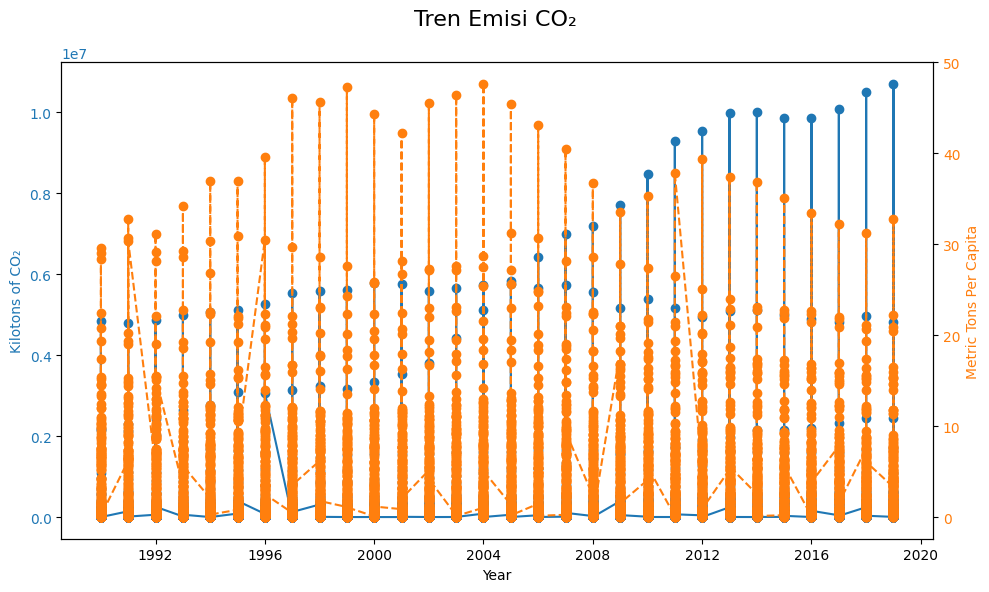

In [ ]:
# Ubah kolom 'Date' menjadi datetime dan urutkan
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df_sort = df.sort_values('Date')

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Kilotons of CO₂
ax1.plot(df_sort['Date'], df_sort['Kilotons of Co2'], color='tab:blue', marker='o', label='Kilotons of CO₂')
ax1.set_xlabel('Year')
ax1.set_ylabel('Kilotons of CO₂', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Buat twin axis untuk Metric Tons Per Capita
ax2 = ax1.twinx()
ax2.plot(df_sort['Date'], df_sort['Metric Tons Per Capita'], color='tab:orange', marker='o', linestyle='--', label='Metric Tons Per Capita')
ax2.set_ylabel('Metric Tons Per Capita', color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# Tambahkan judul dan legenda
fig.suptitle('Tren Emisi CO₂', fontsize=16)
fig.tight_layout()
plt.show()

### **Data Preprocessing**

In [ ]:
# create new dataframe that consist only Kilotons of Co2 and Metric Tons Per Capita
df = df.iloc[:, -2:]
df.head()

,Kilotons of Co2,Metric Tons Per Capita
0,8930.0,0.31
1,8080.0,0.27
2,7110.0,0.25
3,6080.0,0.16
4,6070.0,0.17


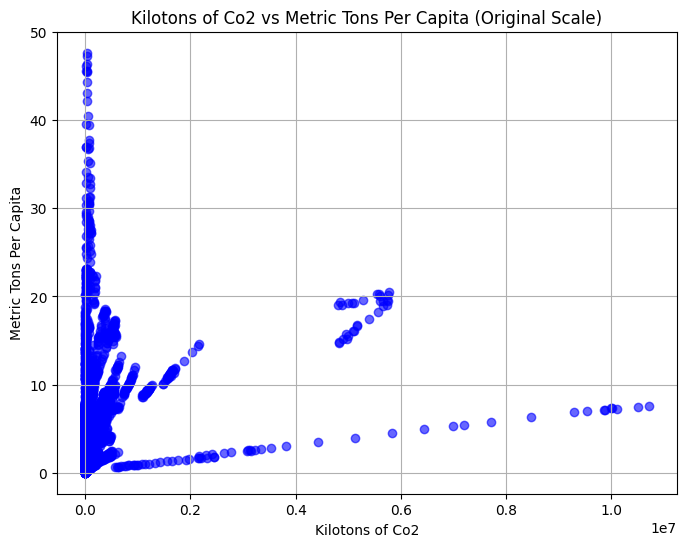

In [ ]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df['Kilotons of Co2'], df['Metric Tons Per Capita'], color='blue', alpha=0.6)
plt.title("Kilotons of Co2 vs Metric Tons Per Capita (Original Scale)")
plt.xlabel("Kilotons of Co2")
plt.ylabel("Metric Tons Per Capita")
plt.grid(True)
plt.show()

In [ ]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["Kilotons of Co2", "Metric Tons Per Capita"])
df.head()

,Kilotons of Co2,Metric Tons Per Capita
0,-0.203829,-0.729647
1,-0.205139,-0.736916
2,-0.206633,-0.740550
3,-0.208220,-0.756904
4,-0.208236,-0.755087


In [ ]:
# get stastical information on the new dataset
df.describe()

,Kilotons of Co2,Metric Tons Per Capita
count,5677.000000,5.677000e+03
mean,0.000000,4.005173e-17
std,1.000088,1.000088e+00
min,-0.217587,-7.859768e-01
25%,-0.215461,-6.824035e-01
50%,-0.203459,-3.571470e-01
75%,-0.127489,3.660490e-01
max,16.278695,7.872388e+00


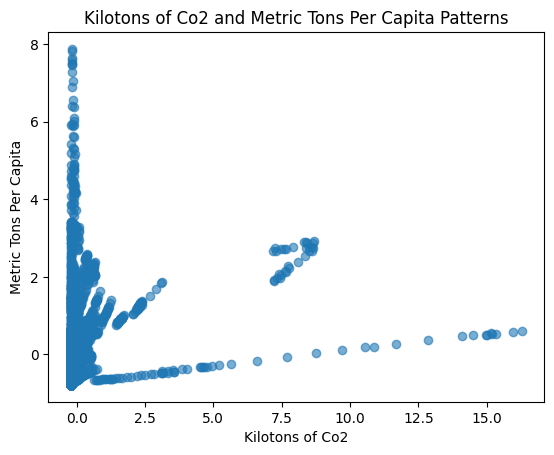

In [ ]:
# Visualize the position
plt.scatter(df["Kilotons of Co2"], df["Metric Tons Per Capita"], alpha=0.6)
plt.xlabel("Kilotons of Co2")
plt.ylabel("Metric Tons Per Capita")
plt.title("Kilotons of Co2 and Metric Tons Per Capita Patterns")
plt.show()

### **Clustering**

In [ ]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

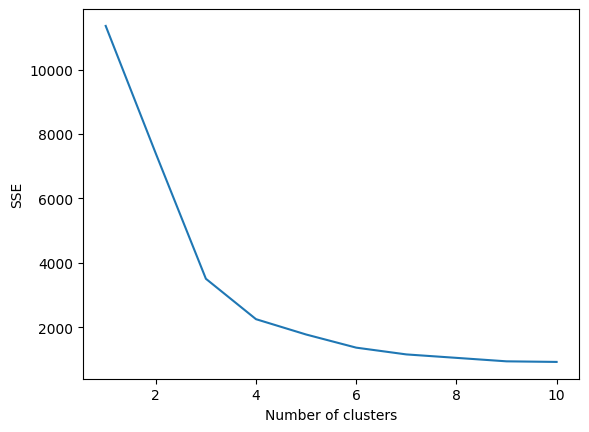

In [ ]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 4


### **K-Means Algorithm**

In [ ]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int32)

<ipython-input-38-6acd5d5d2d95>:3: UserWarning: 
The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = "Kilotons of Co2", y = "Metric Tons Per Capita", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)


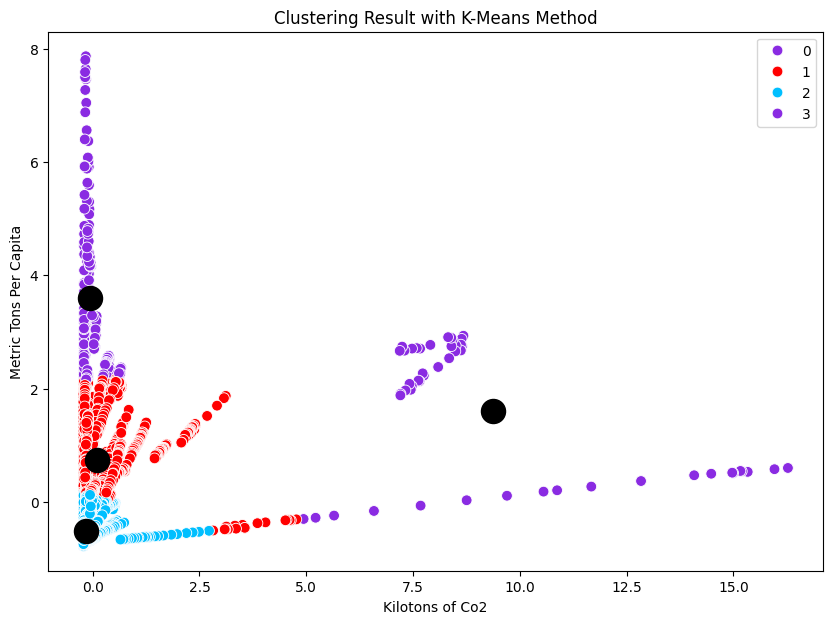

In [ ]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "Kilotons of Co2", y = "Metric Tons Per Capita", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Kilotons of Co2")
plt.ylabel("Metric Tons Per Capita")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [ ]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(sc.inverse_transform(df), columns=["Kilotons of Co2", "Metric Tons Per Capita"])

# Add the cluster labels to the original data
df['Cluster'] = y_pred

# analyze the clusters with the original values
df.head()

,Kilotons of Co2,Metric Tons Per Capita,Cluster
0,8930.0,0.31,2
1,8080.0,0.27,2
2,7110.0,0.25,2
3,6080.0,0.16,2
4,6070.0,0.17,2


In [ ]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_pred).agg({'Kilotons of Co2': ['mean', 'std', 'min', 'max'],
                                          'Metric Tons Per Capita': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

Kilotons of Co2                                        \
                   mean           std        min          max   
cluster                                                         
0          6.221015e+06  1.990194e+06  3346530.0  10707219.73   
1          2.130301e+05  3.968517e+05       60.0   3236280.00   
2          3.499249e+04  1.092944e+05        0.0   1909439.94   
3          1.055296e+05  1.454100e+05     1390.0    571630.00   

        Metric Tons Per Capita                          
                          mean       std    min    max  
cluster                                                 
0                    13.155200  6.447109   2.65  20.47  
1                     8.413017  2.738929   1.53  16.33  
2                     1.517969  1.434350   0.00   5.16  
3                    24.139950  7.478752  16.22  47.65

**Ringkasan Cluster:**

*   Cluster 0: Negara-negara dengan emisi CO2 dalam jumlah sangat besar (rata-rata sekitar 6,22 juta kiloton) dan konsumsi CO2 per kapita yang relatif tinggi (13,15 metric tons per capita). Ini mencakup negara-negara dengan populasi besar dan industrialisasi tinggi.
*   Cluster 1: Negara-negara dengan emisi CO2 moderat (rata-rata 213 ribu kiloton) tetapi konsumsi per kapita yang cukup tinggi (8,41 metric tons per capita). Biasanya negara-negara berkembang atau kecil tetapi memiliki konsumsi energi intensif.
*   Cluster 2: Mayoritas negara dengan emisi CO2 sangat rendah (rata-rata hanya 34 ribu kiloton) dan konsumsi CO2 per kapita kecil (1,52 metric tons per capita). Kemungkinan besar negara-negara berkembang dengan aktivitas ekonomi rendah.
*   Cluster 3: Negara-negara dengan emisi sedang (105 ribu kiloton rata-rata) tetapi konsumsi CO2 per kapita yang sangat tinggi (24,14 metric tons per capita). Mungkin mewakili negara-negara maju dengan populasi kecil tetapi sangat intensif dalam konsumsi energi.

**Interpretasi:**

Grafik menunjukkan distribusi klaster yang mencerminkan variasi dalam pola konsumsi energi dan tingkat emisi CO2, dengan beberapa cluster (misalnya, cluster 3) sangat mencolok dalam konsumsi per kapita.
cluster 2 memiliki jumlah negara paling banyak, menandakan bahwa sebagian besar negara memiliki emisi CO2 rendah.

**Rekomendasi Strategi:**

*   Cluster 0 (Emisi Tinggi): Prioritaskan transisi ke energi terbarukan dan efisiensi energi untuk mengurangi emisi total. Fokus pada program kebijakan lingkungan skala besar.
*   Cluster 1 (Emisi Moderat, Konsumsi Tinggi): Tingkatkan kesadaran dan implementasi solusi teknologi untuk efisiensi energi, seperti teknologi kendaraan listrik dan renovasi bangunan.
*   Cluster 2 (Emisi Rendah): Fokus pada pembangunan ekonomi yang berkelanjutan, dengan pengembangan energi bersih agar emisi tidak meningkat drastis seiring pertumbuhan ekonomi.
*   Cluster 3 (Konsumsi Per Kapita Sangat Tinggi): Kampanye efisiensi energi dan pengurangan konsumsi berlebihan. Mengadopsi kebijakan energi rendah karbon.